#Imports

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#Dataset

In [ ]:
# Parametros do modelo
num_classes = 10
input_shape = (28, 28, 1)

In [ ]:
# Baixando o Datasete e separando os dados em treino e teste
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

#Explorando os dados

In [ ]:
len(x_train)
x_train.shape


(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
len(y_train)

60000

In [ ]:
len(x_test)

10000

In [ ]:
x_train.min()



0

In [ ]:
x_train.max()

255

# Visualizando os dados

In [ ]:
total_de_classificacoes = 10
nomes_de_classificacoes= ['0','1', '2',' 3','4','5','6','7','8','9']

<ipython-input-14-0e592c824d55>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,5,imagem+1)


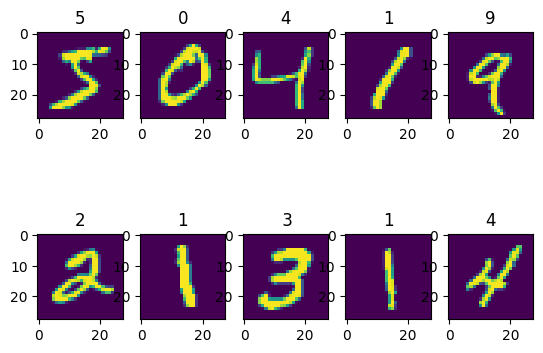

In [ ]:
plt.imshow(x_train[0])
plt.title(y_train[0])
for imagem in range(10):
  plt.subplot(2,5,imagem+1)
  plt.imshow(x_train [imagem])
  plt.title(nomes_de_classificacoes[y_train[imagem]])



# Criando o nosso modelo

In [ ]:
#Modelo duas camadas ou multicamada
Modelo = keras.Sequential([keras.layers.Flatten(input_shape =(28,28)),
                           keras.layers.Dense(256,activation = tf.nn.relu),
                           keras.layers.Dense(10, activation=tf.nn.softmax)])
Modelo.compile(optimizer= 'adam',loss='sparse_categorical_crossentropy')
Modelo.fit(x_train,y_train)

1875/1875 [==============================] - 27s 14ms/step - loss: 2.7200


In [ ]:
# from scipy import ndimage - biblioteca para lidar com imagens e ajustar para preparar o dataset


## Otimizando o modelo

In [ ]:
x_train = x_train/float(255) # Normalização dos dados

##Criação, compilação, treinamento e normalização do modelo

In [ ]:

Modelo = keras.Sequential([keras.layers.Flatten(input_shape =(28,28)),
                           keras.layers.Dense(256,activation = tf.nn.relu),
                           keras.layers.Dropout(0.5),
                           keras.layers.Dense(10, activation=tf.nn.softmax)])
adam = keras.optimizers.Adam(lr=0.002)
callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss'), keras.callbacks.ModelCheckpoint(filepath='Melhormodelo.hdf5',monitor='val_loss',save_best_only=True)]
Modelo.compile(optimizer= adam,
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
historico = Modelo.fit(x_train,y_train, batch_size = 500, epochs = 20, validation_split=0.2, callbacks = callbacks)


Epoch 1/20
96/96 [==============================] - 3s 20ms/step - loss: 0.6602 - accuracy: 0.8046 - val_loss: 0.2805 - val_accuracy: 0.9225
Epoch 2/20
 9/96 [=>............................] - ETA: 1s - loss: 0.3517 - accuracy: 0.9002

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


96/96 [==============================] - 2s 26ms/step - loss: 0.3103 - accuracy: 0.9109 - val_loss: 0.2091 - val_accuracy: 0.9425
Epoch 3/20
96/96 [==============================] - 3s 26ms/step - loss: 0.2410 - accuracy: 0.9310 - val_loss: 0.1732 - val_accuracy: 0.9513
Epoch 4/20
96/96 [==============================] - 2s 19ms/step - loss: 0.2085 - accuracy: 0.9397 - val_loss: 0.1501 - val_accuracy: 0.9578
Epoch 5/20
96/96 [==============================] - 2s 17ms/step - loss: 0.1806 - accuracy: 0.9479 - val_loss: 0.1351 - val_accuracy: 0.9600
Epoch 6/20
96/96 [==============================] - 2s 19ms/step - loss: 0.1634 - accuracy: 0.9538 - val_loss: 0.1236 - val_accuracy: 0.9639
Epoch 7/20
96/96 [==============================] - 2s 19ms/step - loss: 0.1474 - accuracy: 0.9573 - val_loss: 0.1154 - val_accuracy: 0.9663
Epoch 8/20
96/96 [==============================] - 2s 18ms/step - loss: 0.1356 - accuracy: 0.9608 - val_loss: 0.1100 - val_accuracy: 0.9671
Epoch 9/20
96/96 [======

In [ ]:
Modelo.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203530 (795.04 KB)
Trainable params: 203530 (795.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Entendendo o modelo

In [ ]:
Pesos_camada_dense = Modelo.layers[1].get_weights()[0]

In [ ]:
Pesos_camada_dense.shape

(784, 256)

In [ ]:
Modelo.layers[1].get_weights()

In [ ]:
Modelo.get_config()

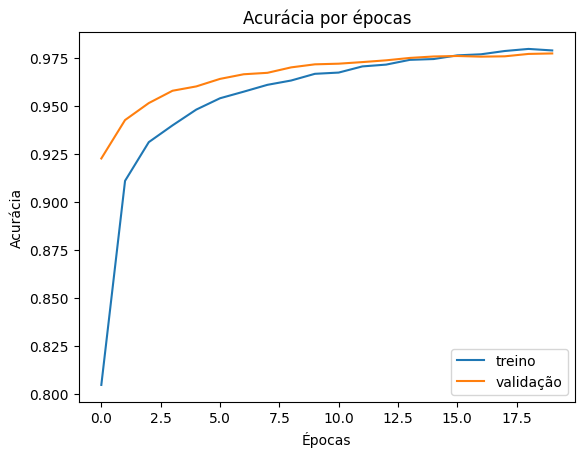

In [ ]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(['treino','validação'])

##Salvando o modelo treinado

In [ ]:

from tensorflow.keras.models import load_model

Modelo.save('modelo.h5')
Modelo_salvo = load_model('modelo.h5')

## Plotando os dados de acurácia e perda por época

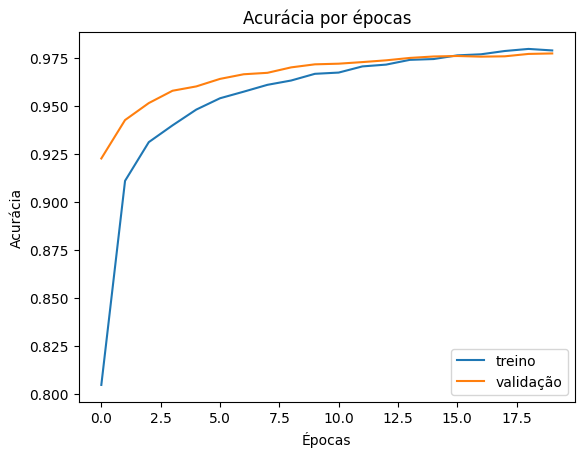

In [ ]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(['treino','validação'])


In [ ]:
#Adicionar camadas ocultas não necessariamente melhoram o modelo
#Modelo = keras.Sequential([keras.layers.Flatten(input_shape =(28,28)), keras.layers.Dense(256,activation = tensorflow.nn.relu),keras.layers.Dense(24, activation=tensorflow.nn.relu), keras.layers.Dense(10, activation=tensorflow.nn.softmax)])
#Modelo.compile(optimizer= 'adam',loss='sparse_categorical_crossentropy')
#Modelo.fit(imagens_treino,identificacoes_treino)

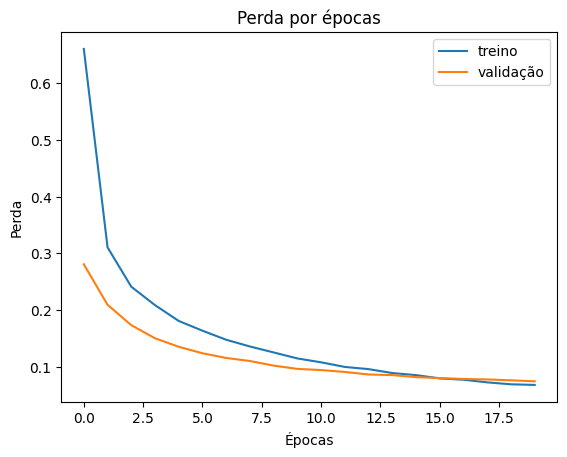

In [ ]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend(['treino','validação'])

#Testando o modelo

In [ ]:
testes= Modelo.predict(x_test)
print('resultado teste:', np.argmax(testes[1]))
print('número da imagem de teste', y_test[1])


313/313 [==============================] - 1s 3ms/step
resultado teste: 2
número da imagem de teste 2


In [ ]:
#Avaliação
perda_teste, acuracia_teste = Modelo.evaluate(x_test,y_test)
print('Perda do teste:', perda_teste, 'Acurácia do teste:', acuracia_teste)

313/313 [==============================] - 1s 4ms/step - loss: 11.0828 - accuracy: 0.9789
Perda do teste: 11.082792282104492 Acurácia do teste: 0.9789000153541565


In [ ]:
testes_modelo_salvo = Modelo_salvo.predict(x_test)
print('resultado teste modelo salvo:', np.argmax(testes_modelo_salvo[1]))
print('número da imagem de teste:', y_test[1])

313/313 [==============================] - 1s 2ms/step
resultado teste modelo salvo: 2
número da imagem de teste: 2


#Avaliando o modelo

In [ ]:
perda_teste, acuracia_teste = Modelo_salvo.evaluate(x_test, y_test)
print('Perda do teste:', perda_teste)
print('Acurácia do teste:', acuracia_teste)

313/313 [==============================] - 1s 2ms/step - loss: 11.0828 - accuracy: 0.9789
Perda do teste: 11.082792282104492
Acurácia do teste: 0.9789000153541565
